In [13]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("spektr.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 9 columns):
SPE    1879 non-null object
COL    1877 non-null float64
ENT    276 non-null object
TEP    1572 non-null float64
V      329 non-null float64
CON    365 non-null float64
TH     255 non-null float64
MAS    1879 non-null float64
AA     22 non-null float64
dtypes: float64(7), object(2)
memory usage: 132.2+ KB


In [58]:
data.COL.unique()

[3.0, 1.0, 7.0, 5.0, 2.0, 6.0]
Categories (6, float64): [3.0, 1.0, 7.0, 5.0, 2.0, 6.0]

In [4]:
data=data.dropna(subset=['V', 'CON'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 1825
Data columns (total 9 columns):
SPE    289 non-null object
COL    289 non-null float64
ENT    59 non-null object
TEP    230 non-null float64
V      289 non-null float64
CON    289 non-null float64
TH     115 non-null float64
MAS    289 non-null float64
AA     17 non-null float64
dtypes: float64(7), object(2)
memory usage: 22.6+ KB


In [23]:
data["COL"] = data["COL"].astype("category")

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 1825
Data columns (total 9 columns):
SPE    289 non-null object
COL    289 non-null category
ENT    59 non-null object
TEP    230 non-null float64
V      289 non-null float64
CON    289 non-null float64
TH     115 non-null float64
MAS    289 non-null float64
AA     17 non-null float64
dtypes: category(1), float64(6), object(2)
memory usage: 30.8+ KB


In [61]:
X = data[["V", "CON"]].values
y = data.COL

In [62]:
X.shape

(289, 2)

In [63]:
from sklearn.decomposition import PCA


In [64]:
# build a PCA model
pca = PCA(n_components=2)


In [65]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [66]:

# transform the digits data onto the first two principal components
X_pca = pca.transform(X)
#colors = list(mcolors.CSS4_COLORS)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

In [67]:
len(X)

289

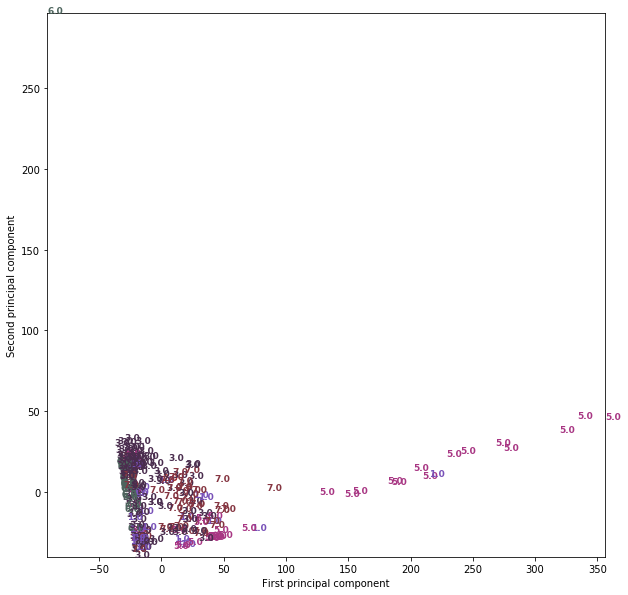

In [68]:
plt.figure(figsize=(10, 10))
plt.xlim(X_pca[:, 0].min(), X_pca[:, 0].max())
plt.ylim(X_pca[:, 1].min(), X_pca[:, 1].max())
for i in range(289):
    # actually plot the digits as text instead of using scatter
    plt.text(X_pca[i, 0], X_pca[i, 1], str(y[i]),
             color = colors[int(y[i])],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.savefig("pca.jpg")
plt.show()


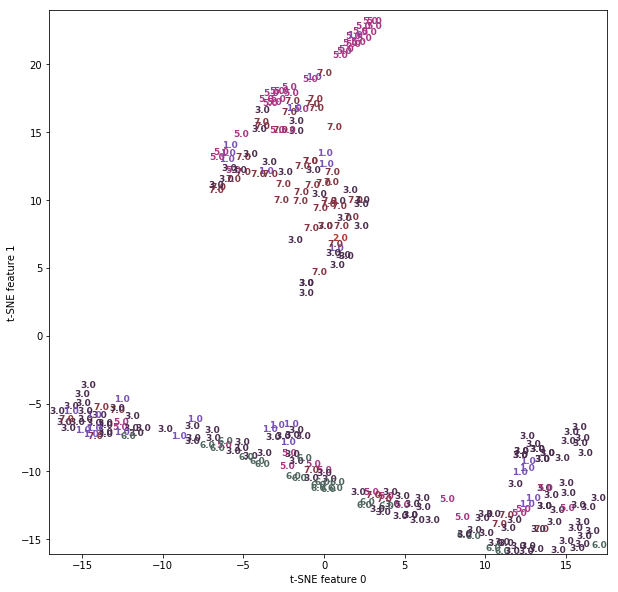

In [69]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]),
             color = colors[int(y[i])],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.savefig("tsne.jpg")
plt.show()


In [70]:
#import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
#from xgboost import plot_importance, plot_tree
#import graphviz
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
#import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
import itertools
from functools import reduce

In [71]:
y.value_counts()

3.0    162
7.0     38
5.0     36
1.0     28
6.0     24
2.0      1
Name: COL, dtype: int64

In [72]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [73]:

models = [LogisticRegression(),
          DecisionTreeClassifier(),
          SVC(probability=True),  
          RandomForestClassifier(), 
          AdaBoostClassifier(),
         #xgb.XGBClassifier()
         ]

for model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions = np.round(y_pred)

    accuracy = accuracy_score(y_test, predictions)
    print("%s accuracy: %.2f%%" % (model.__class__.__name__,accuracy * 100.0))



LogisticRegression accuracy: 67.12%
DecisionTreeClassifier accuracy: 64.38%
SVC accuracy: 58.90%
RandomForestClassifier accuracy: 71.23%
AdaBoostClassifier accuracy: 47.95%


In [74]:

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)


In [75]:
#plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [76]:
labels = ["1","2","3", "5", "6", "7"]


Confusion matrix, without normalization
[[ 2  0  5  0  0  0]
 [ 0  0  1  0  0  0]
 [ 1  0 32  2  2  3]
 [ 0  0  0 10  0  0]
 [ 0  0  2  0  3  0]
 [ 2  0  4  1  0  3]]


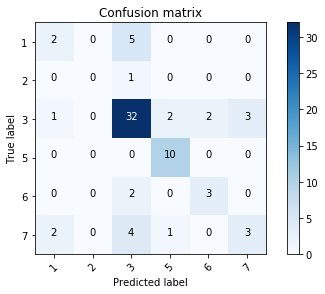

In [79]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=labels,
                      title='Confusion matrix')
plt.savefig("conf_mat.jpg")
plt.show()


In [80]:
y.value_counts()

3.0    162
7.0     38
5.0     36
1.0     28
6.0     24
2.0      1
Name: COL, dtype: int64

In [81]:
y_test.value_counts()

3.0    40
7.0    10
5.0    10
1.0     7
6.0     5
2.0     1
Name: COL, dtype: int64